In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from pybaselines import Baseline, utils

In [2]:
x = np.linspace(1, 1000, 1000)
# a measured signal containing several Gaussian peaks
signal = (
    utils.gaussian(x, 4, 120, 5)
    + utils.gaussian(x, 5, 220, 12)
    + utils.gaussian(x, 5, 350, 10)
    + utils.gaussian(x, 7, 400, 8)
    + utils.gaussian(x, 4, 550, 6)
    + utils.gaussian(x, 5, 680, 14)
    + utils.gaussian(x, 4, 750, 12)
    + utils.gaussian(x, 5, 880, 8)
)

# exponentially decaying baseline
true_baseline = 2 + 10 * np.exp(-x / 400)
noise = np.random.default_rng(1).normal(0, 0.2, x.size)

y = signal + true_baseline + noise

In [3]:
baseline_fitter = Baseline(x, check_finite=False)

bkg_1 = baseline_fitter.modpoly(y, poly_order=3)[0]
bkg_2 = baseline_fitter.asls(y, lam=1e7, p=0.02)[0]
bkg_3 = baseline_fitter.mor(y, half_window=30)[0]
bkg_4 = baseline_fitter.snip(
    y, max_half_window=40, decreasing=True, smooth_half_window=3
)[0]


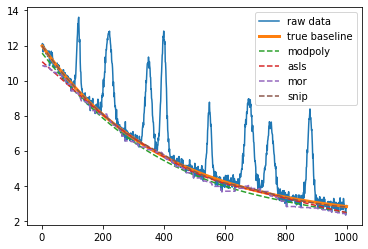

In [4]:
plt.plot(x, y, label='raw data', lw=1.5)
plt.plot(x, true_baseline, lw=3, label='true baseline')
plt.plot(x, bkg_1, '--', label='modpoly')
plt.plot(x, bkg_2, '--', label='asls')
plt.plot(x, bkg_3, '--', label='mor')
plt.plot(x, bkg_4, '--', label='snip')

plt.legend()
plt.show()

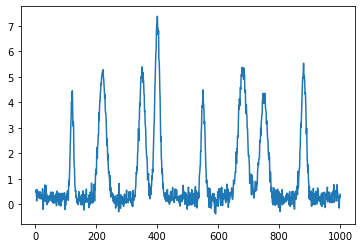

In [5]:
plt.plot(x, y - bkg_1, label='raw data', lw=1.5)
#plt.plot(x, true_baseline, lw=3, label='true baseline')
#plt.plot(x, bkg_1, '--', label='modpoly')


In [14]:
yb = y - bkg_1

In [15]:
data = pd.DataFrame({"x": x, "y": y, "yb": yb})

In [17]:
data.to_csv("peaks_01.csv", sep=";")

In [36]:
peaks = signal.find_peaks(yb, prominence=1, width=1)
peaks

(array([120, 221, 349, 399, 549, 679, 752, 879], dtype=int64),
 {'prominences': array([4.65504108, 5.49845679, 5.16963316, 7.66596049, 4.67356251,
         5.65093584, 4.10304143, 5.67586452]),
  'left_bases': array([ 95, 158, 272, 272, 497, 590, 716, 590], dtype=int64),
  'right_bases': array([158, 272, 374, 590, 590, 802, 802, 996], dtype=int64),
  'widths': array([12.21345323, 28.16721154, 22.67683198, 19.34720937, 14.465151  ,
         34.06664244, 27.57860718, 20.64539063]),
  'width_heights': array([2.1264066 , 2.53011854, 2.80908438, 3.54340622, 2.15229759,
         2.54364565, 2.30256217, 2.69671343]),
  'left_ips': array([112.65658531, 204.4757501 , 338.39506275, 389.32711955,
         542.10065267, 661.80958617, 734.89960674, 868.76922027]),
  'right_ips': array([124.87003854, 232.64296164, 361.07189472, 408.67432892,
         556.56580367, 695.8762286 , 762.47821392, 889.4146109 ])})

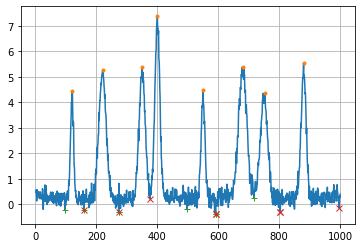

In [37]:
fig, axe = plt.subplots()
axe.plot(x, yb)
axe.plot(x[peaks[0]], yb[peaks[0]], linestyle="none", marker=".")
axe.plot(x[peaks[1]["left_bases"]], yb[peaks[1]["left_bases"]], linestyle="none", marker="+")
axe.plot(x[peaks[1]["right_bases"]], yb[peaks[1]["right_bases"]], linestyle="none", marker="x")
axe.grid()